In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import ROOT
from ROOT import TCanvas, TH1F, TF1, TLegend, gPad, THStack, TColor
import tdrstyle
import os.path
import os

Welcome to JupyROOT 6.17/01


In [2]:
from __future__ import print_function
from ROOT import TCanvas, TGraph
from ROOT import gROOT
from math import sin
from array import array


0.2041


Info in <TCanvas::Print>: pdf file /Users/nick-work/limit.pdf has been created


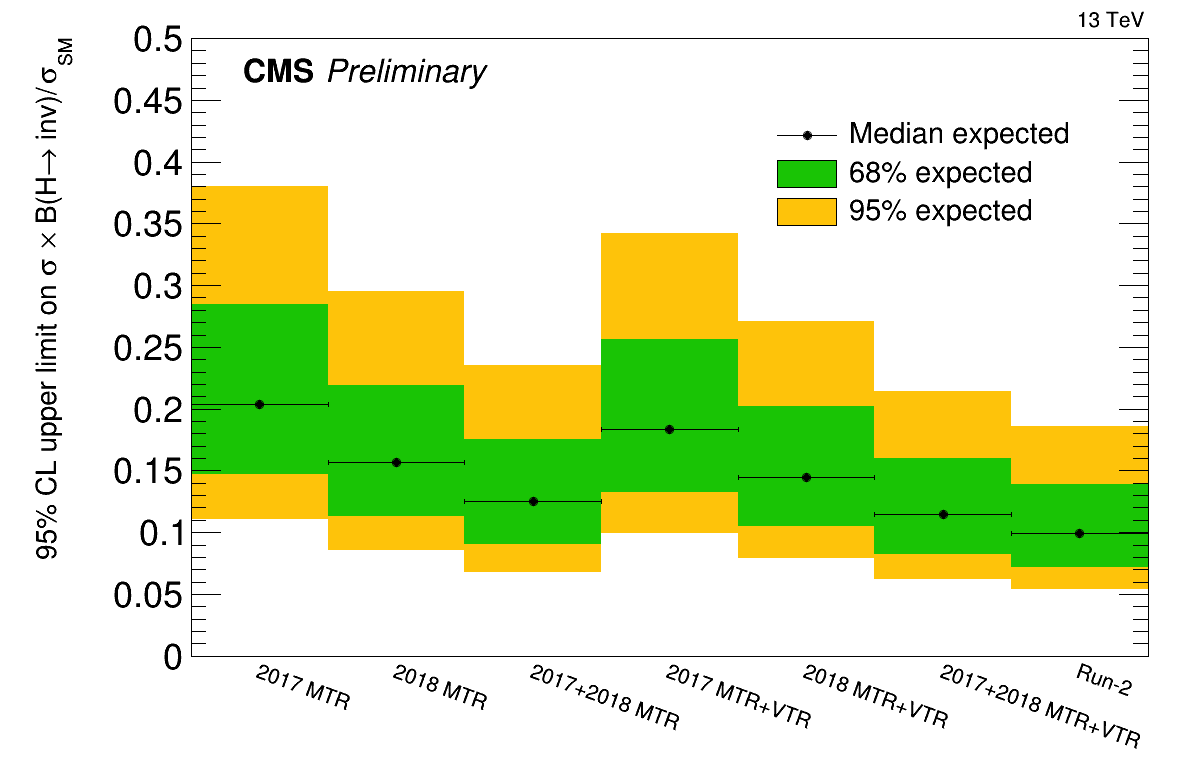

In [3]:


c44 = ROOT.TCanvas("c44","c44",1200,800)
ax = [1, 2, 3, 4, 5, 6, 7]

#ay = [23.3, 18.8, 17.04, 21.00, 16.26, 14.84]
aexl = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
aexh = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
#aeyl_y = [13.08, 10.21, 9.32, 11.65, 8.89, 8.18]
#aeyh_y = [44.38, 34.87, 31.29, 38.35, 30.05, 27.11]

#aeyl = [17.32, 13.56, 12.34, 15.30, 11.77, 10.78]
#aeyh = [33.27, 26.14, 23.56, 28.95, 22.61, 20.46]


#pre freezing
#ay = [0.2090, 0.1494, 0.1226, 0.1821, 0.1289, 0.1060]
#aeyl = [0.1513, 0.1078, 0.0884, 0.1314, 0.0930, 0.0764]
#aeyh  = [0.2906, 0.2072, 0.1709, 0.2540, 0.1798, 0.1478]
#aeyl_y = [0.1143, 0.0811, 0.0665, 0.0989, 0.0700, 0.0575]
#aeyh_y = [0.3876, 0.2777, 0.2285, 0.3395, 0.2403, 0.1975]



#No Mitigation
#ay  = [ 0.1831,0.1367,0.1113,0.1660,0.1240,0.1006,0.0903 ]
#aeyl  = [ 0.1321,0.0986,0.0801,0.1198,0.0895,0.0726,0.0650 ]
#aeyh  = [ 0.2554,0.1907,0.1553,0.2315,0.1730,0.1403,0.1256 ]
#aeyl_y  = [ 0.0994,0.0742,0.0600,0.0901,0.0673,0.0546,0.0487 ]
#aeyh_y  = [ 0.3413,0.2549,0.2075,0.3095,0.2312,0.1875,0.1681 ]


ay  = [ 0.2041,0.1572,0.1255,0.1836,0.1450,0.1147,0.0996 ]
aeyl  = [ 0.1473,0.1134,0.0905,0.1325,0.1046,0.0825,0.0719 ]
aeyh  = [ 0.2846,0.2193,0.1755,0.2560,0.2022,0.1600,0.1389 ]
aeyl_y  = [ 0.1108,0.0854,0.0681,0.0997,0.0787,0.0619,0.0541 ]
aeyh_y  = [ 0.3805,0.2951,0.2351,0.3422,0.2713,0.2146,0.1857 ]

n = len(ax)

col = ROOT.TColor()
green = col.GetColor('#19C405')
yellow = col.GetColor('#FEC30A')


#2017 METMHT -> 2018 METMHT -> 2017+2018 METMHT -> 2017 METMHT+VBF -> 2018 METMHT+VBF -> FULL
#ax = [4, 1, 3, 2, 5, 6]

labels = ['2017 MTR ' , '2018 MTR', '2017+2018 MTR', '2017 MTR+VTR', '2018 MTR+VTR', '2017+2018 MTR+VTR', "Run-2"]
legend_args = (0.64, 0.7, 0.92, 0.85, '', 'NDC')
       
legend = TLegend(*legend_args)
legend.SetFillStyle(0)
legend.SetTextFont(42)

x, y, exl, exh, eyl, eyh, eyl_y, eyh_y, eyl_n, eyh_n = array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ) , array( 'd' ), array( 'd' )
#x, y, exl, exh, eyl, eyh = array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' )
print(ay[0])
for i in range( n ): 
    

    x.append( ax[i])
    y.append( ay[i])
    
    exh.append( aexh[i] )
    exl.append( aexl[i] )
    
    eyh.append( (aeyh[i]-ay[i]) )
    eyl.append( (ay[i]-aeyl[i]) )
    
    eyh_y.append( (aeyh_y[i]-ay[i]) )
    eyl_y.append( (ay[i]-aeyl_y[i]) )
    
    eyh_n.append( 0 )
    eyl_n.append( 0 )
    
    
    
gae = ROOT.TGraphAsymmErrors(n, x, y, exl, exh, eyl, eyh)
yae = ROOT.TGraphAsymmErrors(n, x, y, exl, exh, eyl_y, eyh_y)
nae = ROOT.TGraphAsymmErrors(n, x, y, exl, exh, eyl_n, eyh_n)


gae.SetFillColor(green)
#gae.SetFillStyle(3001)
gae.SetMarkerStyle(0)


yae.SetFillColor(yellow)
#yae.SetFillStyle(3001)
yae.SetMarkerStyle(0)


legend.AddEntry(nae, "Median expected", 'lp')
legend.AddEntry(gae, "68% expected", 'f')
legend.AddEntry(yae, "95% expected", 'f')

dummyHistogram = ROOT.TH1F("dummy","",7,0.5,7.5)
dummyHistogram.GetXaxis().SetTitleOffset(1.8)
dummyHistogram.GetXaxis().SetLabelSize(0.045)
dummyHistogram.GetXaxis().SetRangeUser(0.5, 7.5)
dummyHistogram.GetYaxis().SetRangeUser(0, 0.5)
dummyHistogram.GetYaxis().SetTitle("95% CL upper limit on#sigma #times B(H#rightarrow inv)/#sigma_{SM}")
dummyHistogram.GetYaxis().SetTitleSize(0.04)
dummyHistogram.GetYaxis().SetTitleOffset(1.8)


xax = dummyHistogram.GetXaxis()
for i in range(1, n+1):
    binIndex = xax.FindBin(i)
    xax.SetBinLabel(binIndex, str(labels[i-1]))
#xax.LabelsOption("v")
xax.SetTickLength(0)
dummyHistogram.Draw("AXIS")

#.LabelsOption("v", "X")
gae.Draw("p e2")
yae.Draw("e2 same")
gae.Draw("e2 same")
nae.Draw("p same")

legend.Draw()


gPad.RedrawAxis()
tdrstyle.cmsPrel(lumi=0, energy= 13,simOnly=False)
c44.Draw()
c44.SaveAs("~/limit.pdf")